#### 1) Import Libraries & load datasets

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

In [71]:
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

#### 2) Data validation (for all 4 datasets) 
Checked presence of null/na values using either .info() or .isna().sum() - No null values present

Checked data types using .dtype() or .info() - Data type of date needs to be changed

In [72]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


#### 3) Creating master data

In [73]:
## Merging transaction, cab, city, and customer data
transaction = transaction.join(customer.set_index('Customer ID'), on ='Customer ID')
cab = cab.join(transaction.set_index('Transaction ID'), on = 'Transaction ID')
cab = cab.join(city.set_index('City'), on = 'City')
df = cab

In [74]:
df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users'],
      dtype='object')

#### 4) Data Processing (on master data df)

In [6]:
## Change data type of 'Date of Travel'

df['Date of Travel'] = pd.to_datetime(df['Date of Travel'], origin='1899-12-30', unit='D').dt.strftime('%Y-%m-%d')

In [7]:
## Adding new columns

df['Year of Travel'] = df['Date of Travel'].str[:4]
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

In [8]:
## Manipulating city names to extract state information in 'df' and 'City' datasets

df['City'].replace(to_replace = 'ORANGE COUNTY', value = 'ORANGE COUNTY CA', inplace = True)
df['City'].replace(to_replace = 'SILICON VALLEY', value = 'SILICON VALLEY CA', inplace = True)

df['State'] = df['City'].str[-2:]


In [9]:
df['State'].unique()

array(['GA', 'TX', 'MA', 'IL', 'CO', 'CA', 'FL', 'TN', 'NY', 'AZ', 'PA',
       'WA', 'DC'], dtype=object)

In [10]:
## Check correlation between columns (this takes a while to load hence commented)

#sns.pairplot(data=df)

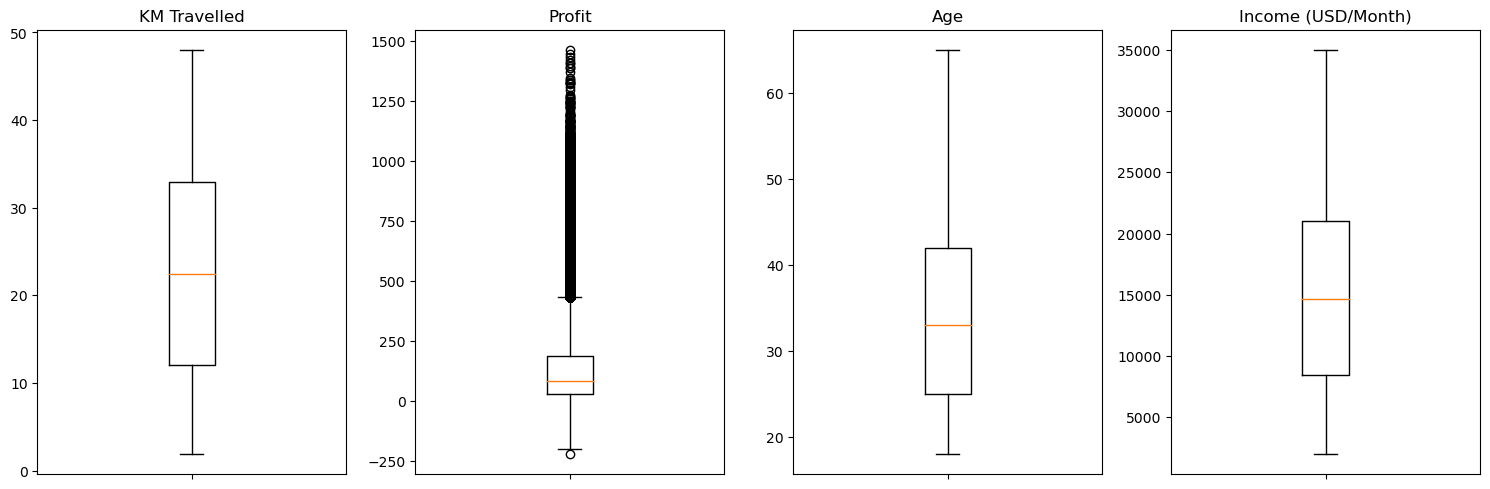

In [11]:
## Outlier check - Outliers in profit are ignored prior to further analysis

import matplotlib.pyplot as plt

# Specify the columns to plot
columns = ['KM Travelled', 'Profit', 'Age', 'Income (USD/Month)']

# Create subplots with a single row and the number of columns equal to the number of specified columns
fig, axs = plt.subplots(1, len(columns), figsize=(15, 5))

# Iterate through each dataset and plot a box plot
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    axs[i].set_xticklabels([])  # Hide x-axis labels for cleaner appearance

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

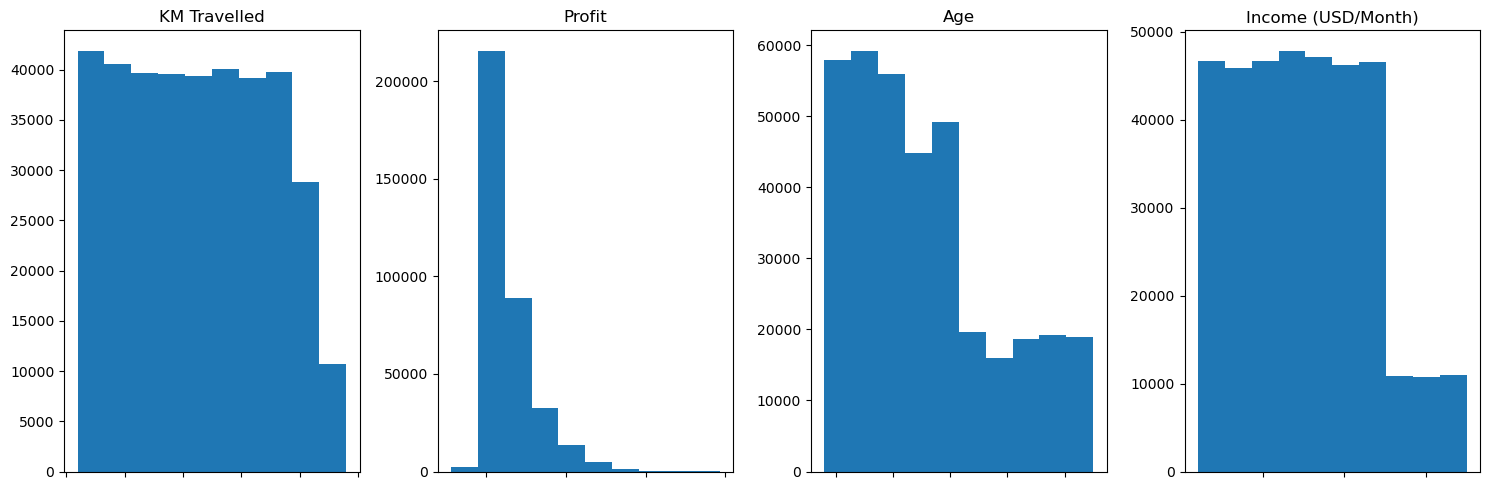

In [12]:
## Histogram to check distribution

import matplotlib.pyplot as plt

# Specify the columns to plot
columns = ['KM Travelled', 'Profit', 'Age', 'Income (USD/Month)']

# Create subplots with a single row and the number of columns equal to the number of specified columns
fig, axs = plt.subplots(1, len(columns), figsize=(15, 5))

# Iterate through each dataset and plot a box plot
for i, col in enumerate(columns):
    axs[i].hist(df[col])
    axs[i].set_title(col)
    axs[i].set_xticklabels([])  # Hide x-axis labels for cleaner appearance

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

C:\Users\Antara Lole\AppData\Local\Temp\ipykernel_2016\2058359776.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

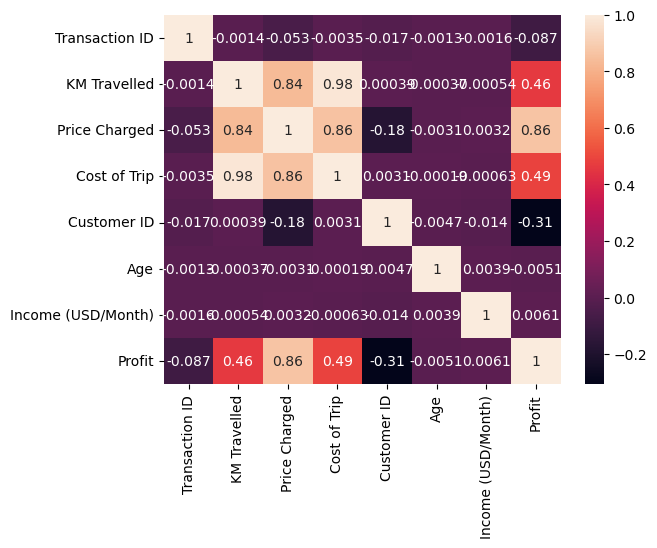

In [13]:
## Correlation map
corr = df.corr()
sns.heatmap(corr,annot=True)

#### 5) Data Visualisations - Distribution across Cab Companies

#### 1) Total distance travelled, total profit, total trips, and total unique customers preferring Pink and Yellow Cabs

In [14]:
## Grouped datasets

total_distance_profit_cabwise = df.groupby(['Company'])['KM Travelled','Profit'].sum().reset_index( )
total_trips_cabwise = df.groupby(['Company'])['Transaction ID'].count().reset_index()
total_unique_customers_cabwise = df.groupby(['Company'])['Customer ID'].nunique().reset_index()

C:\Users\Antara Lole\AppData\Local\Temp\ipykernel_2016\3575361996.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_distance_profit_cabwise = df.groupby(['Company'])['KM Travelled','Profit'].sum().reset_index( )


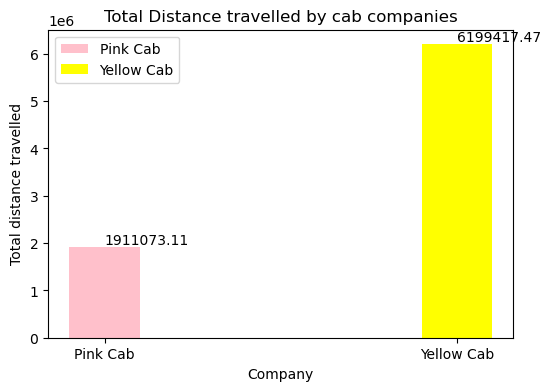

In [58]:
## Total Distance Travelled

# Separate data for Pink Cab and Yellow Cab
pink_cab_data = total_distance_profit_cabwise[total_distance_profit_cabwise['Company'] == 'Pink Cab']
yellow_cab_data = total_distance_profit_cabwise[total_distance_profit_cabwise['Company'] == 'Yellow Cab']

plt.rcParams['figure.figsize'] = [6, 4]

ax1 = plt.bar(pink_cab_data['Company'], pink_cab_data['KM Travelled'], label='Pink Cab',color='pink', width=0.2)
for bar in ax1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

ax2 = plt.bar(yellow_cab_data['Company'], yellow_cab_data['KM Travelled'], label='Yellow Cab',color='yellow',width=0.2)
for bar in ax2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Company')
plt.ylabel('Total distance travelled')
plt.legend()
plt.title('Total Distance travelled by cab companies')

plt.show()

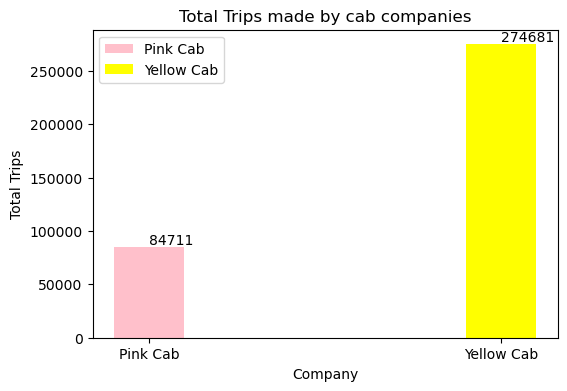

In [59]:
## Total Trips

# Separate data for Pink Cab and Yellow Cab
pink_cab_data = total_trips_cabwise[total_trips_cabwise['Company'] == 'Pink Cab']
yellow_cab_data = total_trips_cabwise[total_trips_cabwise['Company'] == 'Yellow Cab']

plt.rcParams['figure.figsize'] = [6, 4]

ax1 = plt.bar(pink_cab_data['Company'], pink_cab_data['Transaction ID'], label='Pink Cab',color='pink', width=0.2)
for bar in ax1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

ax2 = plt.bar(yellow_cab_data['Company'], yellow_cab_data['Transaction ID'], label='Yellow Cab',color='yellow',width=0.2)
for bar in ax2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Company')
plt.ylabel('Total Trips')
plt.legend()
plt.title('Total Trips made by cab companies')

plt.show()

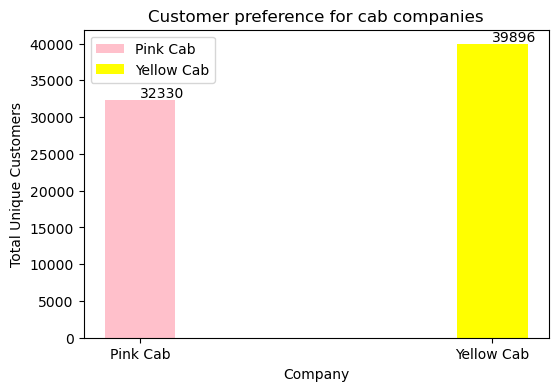

In [60]:
## Total Unique Customers: One customer can perform trips with both pink and yellow cabs

# Separate data for Pink Cab and Yellow Cab
pink_cab_data = total_unique_customers_cabwise[total_unique_customers_cabwise['Company'] == 'Pink Cab']
yellow_cab_data = total_unique_customers_cabwise[total_unique_customers_cabwise['Company'] == 'Yellow Cab']

plt.rcParams['figure.figsize'] = [6, 4]

ax1 = plt.bar(pink_cab_data['Company'], pink_cab_data['Customer ID'], label='Pink Cab',color='pink', width=0.2)
for bar in ax1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

ax2 = plt.bar(yellow_cab_data['Company'], yellow_cab_data['Customer ID'], label='Yellow Cab',color='yellow',width=0.2)
for bar in ax2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.xlabel('Company')
plt.ylabel('Total Unique Customers')
plt.legend()
plt.title('Customer preference for cab companies')

plt.show()

#### 6) Data Visualisations - Distribution across States

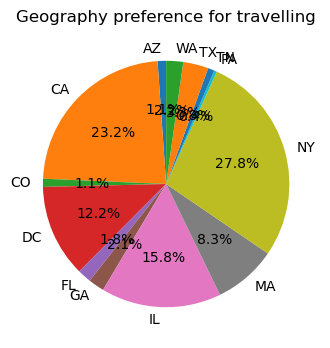

<Figure size 600x400 with 0 Axes>

In [61]:
## Trips across geographies

trips_across_geography = df.groupby('State')['Transaction ID'].size().reset_index()

plt.rcParams['figure.figsize'] = [6, 4]
plt.pie(trips_across_geography['Transaction ID'], labels=trips_across_geography['State'], startangle=90, autopct='%1.1f%%')

plt.title('Geography preference for travelling')
plt.show()
plt.tight_layout()

In [19]:
users_travelling = df[['City', 'Population', 'Users','State']]
users_travelling['Users'] = users_travelling['Users'].str.replace(',','')
users_travelling['Population'] = users_travelling['Population'].str.replace(',','')

users_travelling['Users'] = users_travelling['Users'].astype(int)
users_travelling['Population'] = users_travelling['Population'].astype(int)

C:\Users\Antara Lole\AppData\Local\Temp\ipykernel_2016\4050699980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_travelling['Users'] = users_travelling['Users'].str.replace(',','')
C:\Users\Antara Lole\AppData\Local\Temp\ipykernel_2016\4050699980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_travelling['Population'] = users_travelling['Population'].str.replace(',','')
C:\Users\Antara Lole\AppData\Local\Temp\ipykernel_2016\4050699980.py:5: SettingWithCopyWarning: 
A value is trying to 

In [20]:
deduped_percent_users_travelling = users_travelling.drop_duplicates('City')

In [21]:
deduped_percent_users_travelling['% of Users'] = round(((deduped_percent_users_travelling['Users'] / deduped_percent_users_travelling['Population']) * 100),0) 

C:\Users\Antara Lole\AppData\Local\Temp\ipykernel_2016\3679247628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deduped_percent_users_travelling['% of Users'] = round(((deduped_percent_users_travelling['Users'] / deduped_percent_users_travelling['Population']) * 100),0)


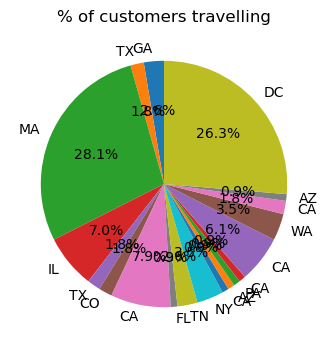

<Figure size 600x400 with 0 Axes>

In [62]:
## % of people travelling the most from a particular state

plt.rcParams['figure.figsize'] = [6, 4]
plt.pie(deduped_percent_users_travelling['% of Users'], labels=deduped_percent_users_travelling['State'], startangle=90, autopct='%1.1f%%')
plt.title("% of customers travelling")

plt.show()
plt.tight_layout()

#### 7) Data Visualisations - Distribution across Years

In [23]:
## Grouped datasets

distance_profit_yearwise = df.groupby(['Year of Travel','Company'])['KM Travelled','Profit'].sum().reset_index()
total_trips_yearwise = df.groupby(['Year of Travel','Company'])['Transaction ID'].count().reset_index()
total_unique_customers_yearwise = df.groupby(['Year of Travel','Company'])['Customer ID'].nunique().reset_index()

C:\Users\Antara Lole\AppData\Local\Temp\ipykernel_2016\837080954.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  distance_profit_yearwise = df.groupby(['Year of Travel','Company'])['KM Travelled','Profit'].sum().reset_index()


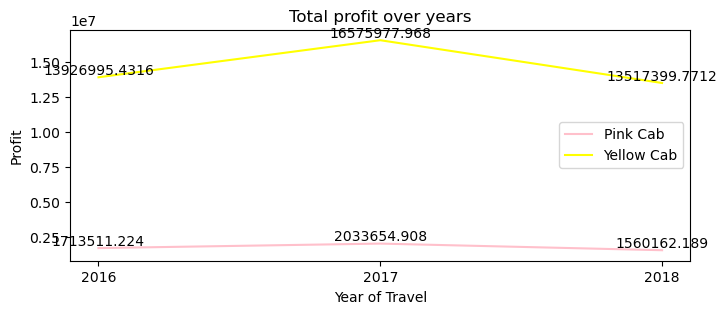

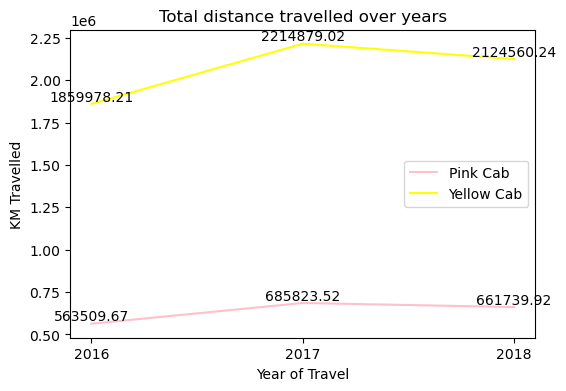

In [63]:
# Separate data for Pink Cab and Yellow Cab
pink_cab_data = distance_profit_yearwise[distance_profit_yearwise['Company'] == 'Pink Cab']
yellow_cab_data = distance_profit_yearwise[distance_profit_yearwise['Company'] == 'Yellow Cab']

# Plotting line graph
plt.figure(figsize=(8, 3))

# Plotting line graph for Pink Cab
plt.plot(pink_cab_data['Year of Travel'], pink_cab_data['Profit'], label='Pink Cab',color='pink')
# Adding bar labels for Pink Cab
for i in range(len(pink_cab_data)):
    plt.text(pink_cab_data.iloc[i]['Year of Travel'], pink_cab_data.iloc[i]['Profit'], 
             str(pink_cab_data.iloc[i]['Profit']), ha='center', va='bottom')
# Plotting line graph for Yellow Cab
plt.plot(yellow_cab_data['Year of Travel'], yellow_cab_data['Profit'], label='Yellow Cab',color='yellow')
# Adding bar labels for Yellow Cab
for i in range(len(yellow_cab_data)):
    plt.text(yellow_cab_data.iloc[i]['Year of Travel'], yellow_cab_data.iloc[i]['Profit'], 
             str(yellow_cab_data.iloc[i]['Profit']), ha='center', va='bottom')
# Adding labels and title
plt.xlabel('Year of Travel')
plt.ylabel('Profit')
plt.title('Total profit over years')
# Adding legend
plt.legend()
# Display the chart
plt.show()


# Plotting line graph for Pink Cab
plt.plot(pink_cab_data['Year of Travel'], pink_cab_data['KM Travelled'], label='Pink Cab',color='pink')
# Adding bar labels for Pink Cab
for i in range(len(pink_cab_data)):
    plt.text(pink_cab_data.iloc[i]['Year of Travel'], pink_cab_data.iloc[i]['KM Travelled'], 
             str(pink_cab_data.iloc[i]['KM Travelled']), ha='center', va='bottom')
# Plotting line graph for Yellow Cab
plt.plot(yellow_cab_data['Year of Travel'], yellow_cab_data['KM Travelled'], label='Yellow Cab',color='yellow')
# Adding bar labels for Yellow Cab
for i in range(len(yellow_cab_data)):
    plt.text(yellow_cab_data.iloc[i]['Year of Travel'], yellow_cab_data.iloc[i]['KM Travelled'], 
             str(yellow_cab_data.iloc[i]['KM Travelled']), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Year of Travel')
plt.ylabel('KM Travelled')
plt.title('Total distance travelled over years')
# Adding legend
plt.legend()
# Display the chart
plt.show()

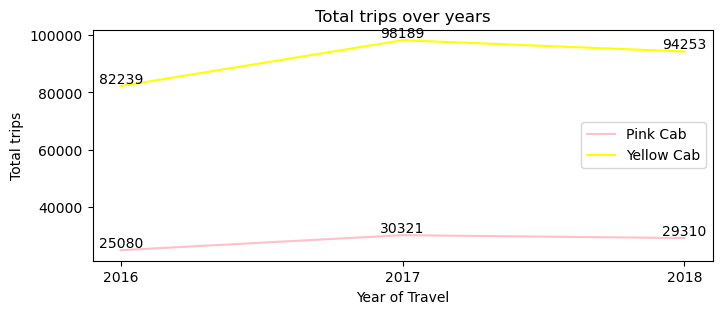

In [64]:
# Separate data for Pink Cab and Yellow Cab
pink_cab_data = total_trips_yearwise[total_trips_yearwise['Company'] == 'Pink Cab']
yellow_cab_data = total_trips_yearwise[total_trips_yearwise['Company'] == 'Yellow Cab']

# Plotting line graph
plt.figure(figsize=(8, 3))

# Plotting line graph for Pink Cab
plt.plot(pink_cab_data['Year of Travel'], pink_cab_data['Transaction ID'], label='Pink Cab',color='pink')
# Adding bar labels for Pink Cab
for i in range(len(pink_cab_data)):
    plt.text(pink_cab_data.iloc[i]['Year of Travel'], pink_cab_data.iloc[i]['Transaction ID'], 
             str(pink_cab_data.iloc[i]['Transaction ID']), ha='center', va='bottom')

# Plotting line graph for Yellow Cab
plt.plot(yellow_cab_data['Year of Travel'], yellow_cab_data['Transaction ID'], label='Yellow Cab',color='yellow')
# Adding bar labels for Yellow Cab
for i in range(len(yellow_cab_data)):
    plt.text(yellow_cab_data.iloc[i]['Year of Travel'], yellow_cab_data.iloc[i]['Transaction ID'], 
             str(yellow_cab_data.iloc[i]['Transaction ID']), ha='center', va='bottom')
# Adding labels and title
plt.xlabel('Year of Travel')
plt.ylabel('Total trips')
plt.title('Total trips over years')
# Adding legend
plt.legend()
# Display the chart
plt.show()

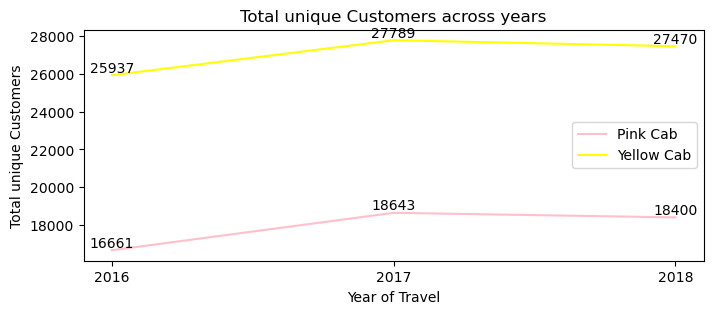

In [65]:
# Separate data for Pink Cab and Yellow Cab
pink_cab_data = total_unique_customers_yearwise[total_unique_customers_yearwise['Company'] == 'Pink Cab']
yellow_cab_data = total_unique_customers_yearwise[total_unique_customers_yearwise['Company'] == 'Yellow Cab']

# Plotting line graph
plt.figure(figsize=(8, 3))

# Plotting line graph for Pink Cab
plt.plot(pink_cab_data['Year of Travel'], pink_cab_data['Customer ID'], label='Pink Cab',color='pink')
# Adding bar labels for Pink Cab
for i in range(len(pink_cab_data)):
    plt.text(pink_cab_data.iloc[i]['Year of Travel'], pink_cab_data.iloc[i]['Customer ID'], 
             str(pink_cab_data.iloc[i]['Customer ID']), ha='center', va='bottom')

# Plotting line graph for Yellow Cab
plt.plot(yellow_cab_data['Year of Travel'], yellow_cab_data['Customer ID'], label='Yellow Cab',color='yellow')
# Adding bar labels for Yellow Cab
for i in range(len(yellow_cab_data)):
    plt.text(yellow_cab_data.iloc[i]['Year of Travel'], yellow_cab_data.iloc[i]['Customer ID'], 
             str(yellow_cab_data.iloc[i]['Customer ID']), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Year of Travel')
plt.ylabel('Total unique Customers')
plt.title('Total unique Customers across years')
# Adding legend
plt.legend()
# Display the chart
plt.show()

#### 8) Data Visualisations - Customer Attributes

In [28]:
## Since one customer can make multiple trips, to understand the characteristics we dedupe them prior to conducting the analysis 

deduped_customer_attributes = df.drop_duplicates('Customer ID')
deduped_customer_attributes

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Profit,State
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701",2016,57.3150,GA
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701",2016,23.6660,GA
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701",2016,27.5680,GA
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,"814,885","24,701",2016,25.7980,GA
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,"814,885","24,701",2016,16.8440,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359114,10439790,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card,Female,42,19417,"671,238","25,063",2018,47.2656,WA
359123,10439799,2018-01-03,Yellow Cab,SILICON VALLEY CA,13.72,277.97,172.8720,12490,Cash,Male,33,18713,"1,177,609","27,247",2018,105.0980,CA
359155,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card,Male,38,3960,"631,442","5,712",2018,71.2100,AZ
359157,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash,Male,23,19454,"631,442","5,712",2018,21.8600,AZ


In [51]:
## Adding Age Group column

deduped_customer_attributes['Age Group'] = ''

# Iterate over rows and assign Age Group based on Age values
for index, row in deduped_customer_attributes.iterrows():
    if row['Age'] <= 30:
        deduped_customer_attributes.at[index, 'Age Group'] = 'Young'
    elif row['Age'] >= 50:
        deduped_customer_attributes.at[index, 'Age Group'] = 'Old'
    else:
        deduped_customer_attributes.at[index, 'Age Group'] = 'Middle-aged'


C:\Users\Antara Lole\AppData\Local\Temp\ipykernel_2016\2923092630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deduped_customer_attributes['Age Group'] = ''


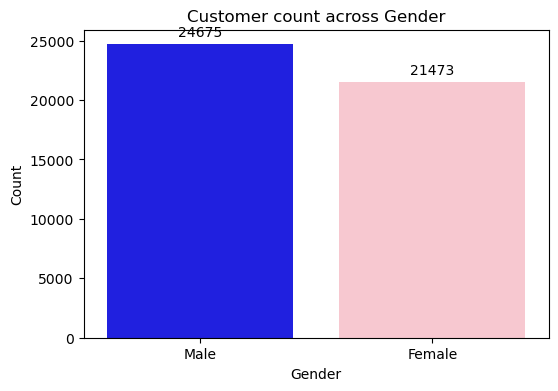

In [66]:
## Total number of male and female customers

ax = sns.barplot(x='index', y='Gender', data=gender_counts, palette={'Male': 'blue', 'Female': 'pink'})

# Adding data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Customer count across Gender')

# Display the plot
plt.show()


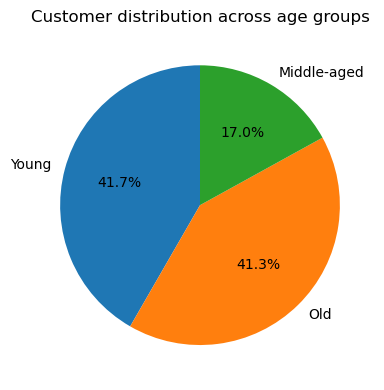

In [67]:
## Total number of male and female customers

import matplotlib.pyplot as plt

# Assuming deduped_customer_attributes contains 'Age Group' column

plt.rcParams['figure.figsize'] = [6, 4]

# Use value_counts() instead of count_values()
plt.pie(deduped_customer_attributes['Age Group'].value_counts(), labels=deduped_customer_attributes['Age Group'].unique(), startangle=90, autopct='%1.1f%%')
plt.title("Customer distribution across age groups")

# Call plt.tight_layout() before plt.show()
plt.tight_layout()
plt.show()


#### Mini Report:

The comparison between Yellow Cab and Pink Cab reveals intriguing insights. Despite Pink Cab's competitive standing, Yellow Cab has emerged as the frontrunner in terms of distance traveled and the number of trips made with a comparable customer base.

When analyzing the preferred states for trips, it becomes evident that New York, California, Illinois, and Washington D.C. are the top contenders. However, further investigation into the states from which most people travel reveals a slight discrepancy. Massachusetts, Washington, and California emerge as the primary sources of travelers, suggesting a broader demographic distribution and varied origins.

Examining the trends across years offers valuable insights into the market dynamics. While both cab companies witnessed significant growth in profits in 2017, 2018 showcased a notable decline in various metrics such as distance traveled, number of trips, and customer engagement. This decline underscores the importance of adaptive strategies to navigate market fluctuations.

Delving into customer demographics uncovers interesting patterns. Despite a nearly equal distribution between male and female customers, the data highlights distinct preferences among age groups. Older and younger demographics exhibit a higher propensity for travel, positioning them as key target segments for marketing initiatives.

Overall, Yellow cab company offers potential for future investment in comparison to the pink cab company. While investing in the yellow cab company, attention should be given to targeting the right set of customers for maximal success.